In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime
from datetime import timedelta
from scipy import stats

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Find columns in each table/class
inspector = inspect(engine)

In [11]:
# Measurement Columns
meas_col = inspector.get_columns('measurement')
for column in meas_col:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Station Columns
stat_col = inspector.get_columns('station')
for column in stat_col:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


### Design a query to retrieve the last 12 months of precipitation data and plot the results

In [13]:
# Calculate the date 1 year ago from the last data point in the database

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print({last_date[0]})


{'2017-08-23'}


In [14]:
# subtract 365 from the above date to get last year of data
# https://stackoverflow.com/questions/441147/how-to-subtract-a-day-from-a-date
# https://stackoverflow.com/questions/8366042/exception-was-unsupported-operand-types-for-str-and-datetime-timedelta
Last_year_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print(Last_year_date)

2016-08-23


In [15]:
# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= Last_year_date).all()
for x in prcp_scores:
    print (x)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_scores, columns = ['Date', 'Precipitation'])
prcp_df.set_index('Date', inplace=True)
prcp_df.head(5)

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [17]:
# Sort the dataframe by date
sortedprcp_df = prcp_df.sort_values(['Date'])
sortedprcp_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


In [18]:
# Replace NaN with 0
sortedprcp_df['Precipitation'] = sortedprcp_df['Precipitation'].fillna(0)
sortedprcp_df.head(5)

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


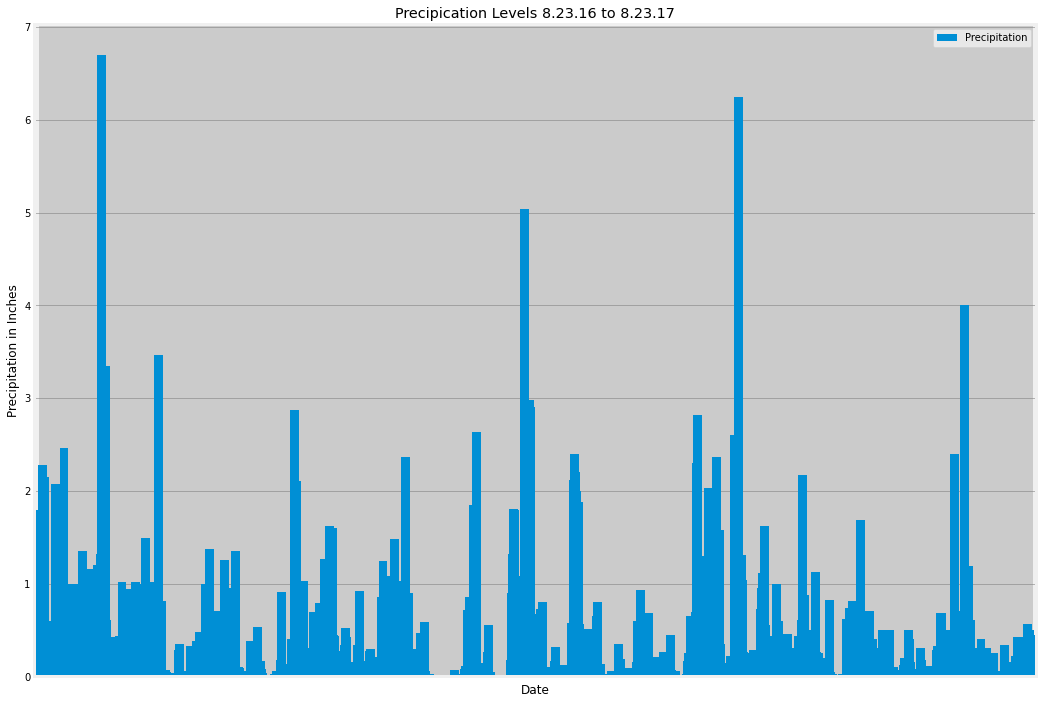

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.grid.html
chart= sortedprcp_df.plot.bar(title="Precipication Levels 8.23.16 to 8.23.17", figsize = (16,12), width=20)
chart.set_xlabel('Date')
chart.set_xticklabels([])
chart.set_ylabel('Precipitation in Inches')
plt.grid(axis='y', color='grey',  alpha=0.55);
plt.show()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sortedprcp_df.describe()

,Precipitation
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


## Station Analysis

In [21]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.id)).all()

[(9)]

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_activity = session.query(Measurement.station, func.count(Measurement.date)).\
group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

Per the above query, station USC00519281 had the most activity

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
min_max_avg_temp = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

print(min_max_avg_temp)

[(54.0, 85.0, 71.66378066378067)]


In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
USC00519281_data = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station ==('USC00519281')).\
filter(Measurement.date > Last_year_date).all()
USC00519281_data

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

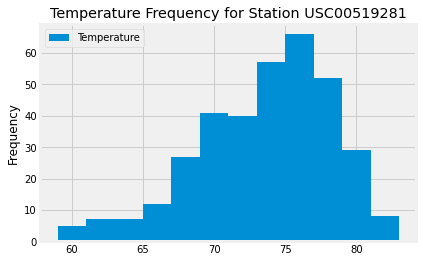

In [25]:
USC00519281_df = pd.DataFrame(USC00519281_data, columns = ['Date', 'Temperature'])
USC00519281_df.plot(kind='hist', bins=12)
plt.title('Temperature Frequency for Station USC00519281')
plt.show()

## Bonus Challenge Assignment

## Temperature Analysis 1
Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, for example, June and December?

You may either use SQLAlchemy or pandas's read_csv() to perform this portion.


In [26]:
# Identify the average temperature in June at all stations across all available years in the dataset. 
# Do the same for December temperature.
# Day 3 activity 3
# get data for June and December
june_temps = session.query(Measurement.date, Measurement.tobs).filter(func.strftime('%m', Measurement.date)=='06').all()
dec_temps = session.query(Measurement.date, Measurement.tobs).filter(func.strftime('%m', Measurement.date)=='12').all()

In [27]:
# convert into dataframes, then concat to create one DataFrame
June_df = pd.DataFrame(june_temps, columns = ['Date', 'Temperature'])
Dec_df = pd.DataFrame(dec_temps, columns = ['Date', 'Temperature'])

June_df['Month'] = 'June'
Dec_df['Month'] = 'December'
June_Dec_df = pd.concat([June_df,Dec_df])
print(len(June_df))
print(len(Dec_df))
print(len(June_Dec_df))
June_Dec_df.head()

1700
1517
3217


,Date,Temperature,Month
0,2010-06-01,78.0,June
1,2010-06-02,76.0,June
2,2010-06-03,78.0,June
3,2010-06-04,76.0,June
4,2010-06-05,77.0,June


In [28]:
# use group_by to get average for each month
avg_temp = June_Dec_df.groupby('Month').mean()
avg_temp

,Temperature
Month,
December,71.041529
June,74.944118


### Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?

The unpaired t-test is being used as we are comparing means from separate groups that are not dependent on each other.

Null Hypothesis: The difference between the mean temperatures of June and December is equal to zero

Hypothesis: The difference between the mean temperatures of June and December is NOT equal to zero

In [29]:
stats.ttest_ind(June_df['Temperature'],Dec_df['Temperature'], equal_var=False)

Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)

With the pvalue lower than 0.05, we can conclude the difference between the means of our two sets of data is not statistically significant.

## Temperature Analysis 2

### I've always wanted to go to Hawaii for Valentine's Day so I will choose February 10 - 20, 2018, since the data only goes to 2017 and I need to calculate the prior year's information.

In [30]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [31]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax  for your trip using the previous year's data for those same dates.
start_date = '2017-02-10'
end_date = '2017-02-20'

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example

trip_temps = calc_temps('2017-02-10', '2017-02-20')
print(calc_temps('2017-02-10', '2017-02-20'))


[(62.0, 71.40298507462687, 80.0)]


In [32]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr) (activity 4 day 3)

trip_df = pd.DataFrame(trip_temps, columns=['TMIN', 'TAVE', 'TMAX'])
trip_df

,TMIN,TAVE,TMAX
0,62.0,71.402985,80.0


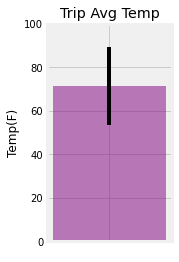

In [33]:
plt.figure(figsize = (2,4))
plt.bar(x=" ",height=71.402985, yerr=trip_df['TMAX']-trip_df['TMIN'],color='purple',alpha=.5)
plt.title("Trip Avg Temp")
plt.ylabel('Temp(F)')
plt.ylim(0,100)
plt.show()

In [34]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
query_colummms = [Station.station, Station.name, func.sum(Measurement.prcp), Station.latitude, Station.longitude, Station.elevation]

Rainfall_per_Station = (session.query(*query_colummms).group_by(Measurement.station).\
                        outerjoin(Station, Measurement.station ==Station.station).\
                        filter(Measurement.date >= start_date).\
                        filter(Measurement.date <= end_date).order_by(Measurement.prcp.desc())).all()
Rainfall_per_Station


[('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  5.85,
  21.33556,
  -157.71139,
  19.5),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 3.01, 21.2716, -157.8168, 3.0),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  5.679999999999999,
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00517948', 'PEARL CITY, HI US', 0.0, 21.3934, -157.9751, 11.9),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  2.8699999999999997,
  21.3331,
  -157.8025,
  152.4),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  4.9799999999999995,
  21.5213,
  -157.8374,
  7.0),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  5.7700000000000005,
  21.4234,
  -157.8015,
  14.6)]

In [35]:
pd.DataFrame(Rainfall_per_Station, columns =["Station","Station Name", "Rainfall Total", "Latitude", "Longitude", "Elevation"]
            ).sort_values("Rainfall Total",ascending=False)

,Station,Station Name,Rainfall Total,Latitude,Longitude,Elevation
0,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",5.85,21.33556,-157.71139,19.5
6,USC00513117,"KANEOHE 838.1, HI US",5.77,21.42340,-157.80150,14.6
2,USC00519281,"WAIHEE 837.5, HI US",5.68,21.45167,-157.84889,32.9
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",4.98,21.52130,-157.83740,7.0
1,USC00519397,"WAIKIKI 717.2, HI US",3.01,21.27160,-157.81680,3.0
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2.87,21.33310,-157.80250,152.4
3,USC00517948,"PEARL CITY, HI US",0.00,21.39340,-157.97510,11.9


## Daily Normals

In [36]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [37]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates

In [38]:
# https://stackoverflow.com/questions/993358/creating-a-range-of-dates-in-python
# https://www.pythonprogramming.in/get-range-of-dates-between-specified-start-and-end-date.html
# https://www.kite.com/python/answers/how-to-create-a-range-of-dates-in-python
vacation_start = dt.date(2018,2,10)
no_of_days = 11

date_range = []
for day in range (no_of_days):
    a_date = (vacation_start + dt.timedelta(days = day)).isoformat()
    date_range.append(a_date)

date_range

['2018-02-10',
 '2018-02-11',
 '2018-02-12',
 '2018-02-13',
 '2018-02-14',
 '2018-02-15',
 '2018-02-16',
 '2018-02-17',
 '2018-02-18',
 '2018-02-19',
 '2018-02-20']

In [39]:
# # convert range into datetime.date object
date_obj = [datetime.strptime(date, "%Y-%m-%d") for date in date_range]
date_obj

[datetime.datetime(2018, 2, 10, 0, 0),
 datetime.datetime(2018, 2, 11, 0, 0),
 datetime.datetime(2018, 2, 12, 0, 0),
 datetime.datetime(2018, 2, 13, 0, 0),
 datetime.datetime(2018, 2, 14, 0, 0),
 datetime.datetime(2018, 2, 15, 0, 0),
 datetime.datetime(2018, 2, 16, 0, 0),
 datetime.datetime(2018, 2, 17, 0, 0),
 datetime.datetime(2018, 2, 18, 0, 0),
 datetime.datetime(2018, 2, 19, 0, 0),
 datetime.datetime(2018, 2, 20, 0, 0)]

In [40]:
# Stip off the year and save a list of %m-%d strings
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
# https://stackoverflow.com/questions/50054195/attributeerror-module-datetime-has-no-attribute-strftime
month_day = [date.strftime("%m-%d") for date in date_obj]
month_day

['02-10',
 '02-11',
 '02-12',
 '02-13',
 '02-14',
 '02-15',
 '02-16',
 '02-17',
 '02-18',
 '02-19',
 '02-20']

In [41]:
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for day in month_day:
    normals.append(*daily_normals(day))
normals

[(56.0, 68.41666666666667, 76.0),
 (61.0, 69.25, 79.0),
 (60.0, 69.15789473684211, 78.0),
 (58.0, 70.36206896551724, 80.0),
 (62.0, 70.89473684210526, 79.0),
 (56.0, 70.28813559322033, 79.0),
 (59.0, 70.48214285714286, 76.0),
 (62.0, 70.47272727272727, 77.0),
 (63.0, 70.79629629629629, 77.0),
 (60.0, 69.33962264150944, 77.0),
 (63.0, 70.14035087719299, 76.0)]

In [49]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals, index=[*date_range],columns = ['TMIN', 'TAVE', 'TMAX'])
normals_df

,TMIN,TAVE,TMAX
2018-02-10,56.0,68.416667,76.0
2018-02-11,61.0,69.250000,79.0
2018-02-12,60.0,69.157895,78.0
2018-02-13,58.0,70.362069,80.0
2018-02-14,62.0,70.894737,79.0
2018-02-15,56.0,70.288136,79.0
2018-02-16,59.0,70.482143,76.0
2018-02-17,62.0,70.472727,77.0
2018-02-18,63.0,70.796296,77.0
2018-02-19,60.0,69.339623,77.0


Text(0.5, 0, 'Date')

<Figure size 360x360 with 0 Axes>

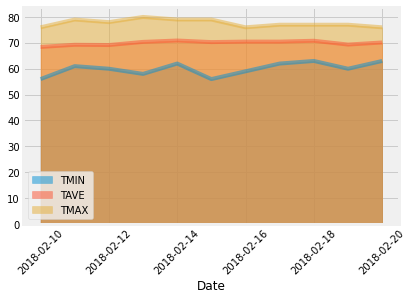

In [50]:
# Plot the daily normals as an area plot with `stacked=False`
plt.figure(figsize = (5,5))
normals_df.plot(kind='area',stacked=False, alpha =.5, rot=45)
plt.xlabel('Date')
